**Carga de paquetes** 

In [1]:
library(devtools)
# install.packages("ggplot2", repos = "http://cran.rstudio.com/")
# install.packages("tidyverse", repos = "http://cran.rstudio.com/")
# install.packages("dplyr", repos = "http://cran.rstudio.com/")
# # install.packages("readxl", repos = "http://cran.rstudio.com/")
# #install.packages("sqldf", repos = "http://cran.rstudio.com/")

install.packages("gplots", repos = "http://cran.rstudio.com/" )
install.packages("RColorBrewer", repos = "http://cran.rstudio.com/")
install.packages("corrplot", repos = "http://cran.rstudio.com/")
install.packages("caret", repos = "http://cran.rstudio.com/")
install.packages("moments", repos = "http://cran.rstudio.com/")

install_github("vqv/ggbiplot") #unica forma de hacer funcionar el gggbiplot

library(ggplot2)
library(tidyverse)
library(dplyr)
library(readxl)
library(corrplot)
library(ggbiplot)
library(gplots)
library(RColorBrewer)
library(caret)
library(moments)

Loading required package: usethis

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘gdata’, ‘caTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




rprojroot (1.2   -> 1.3-2) [CRAN]
processx  (3.4.1 -> 3.4.2) [CRAN]
farver    (2.0.1 -> 2.0.3) [CRAN]


Installing 3 packages: rprojroot, processx, farver

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmprAvR45/remotes7e17ade90f/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.84 loaded

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summari

## Carga de Datos desde GDrive

In [ ]:
#Para poder cargar el CSV desde drive el archivo tiene que ser publico, ejemplo de como hacerlo
#https://drive.google.com/file/d/1LGEUVxZf2W8at10jecY6EwUVzmSI_x-V/
#https://drive.google.com/file/d/1MEvf18G522cXIYOIQ9pJoj5OJRkuAK7q/
system("gdown --id 18HJL4uAdJTfUKe3D6Q3sjaFXBTcTwt3o") # Tweets
system("gdown --id 1bKqwvGQODcOQeqQtP-6JOoys-ow82EUO") # Users
system("gdown --id 1LGEUVxZf2W8at10jecY6EwUVzmSI_x-V")
system("gdown --id 1MEvf18G522cXIYOIQ9pJoj5OJRkuAK7q")
df_hashtag_info <- read.csv("Hashtags_info_with_grouping.csv")
df_hashtag_over_time <- read.csv("Hashtags_OverTime.csv")
Tweets <- read.csv("tweets.csv")
Users <- read.csv("Users.csv")

# Análisis para usuarios

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



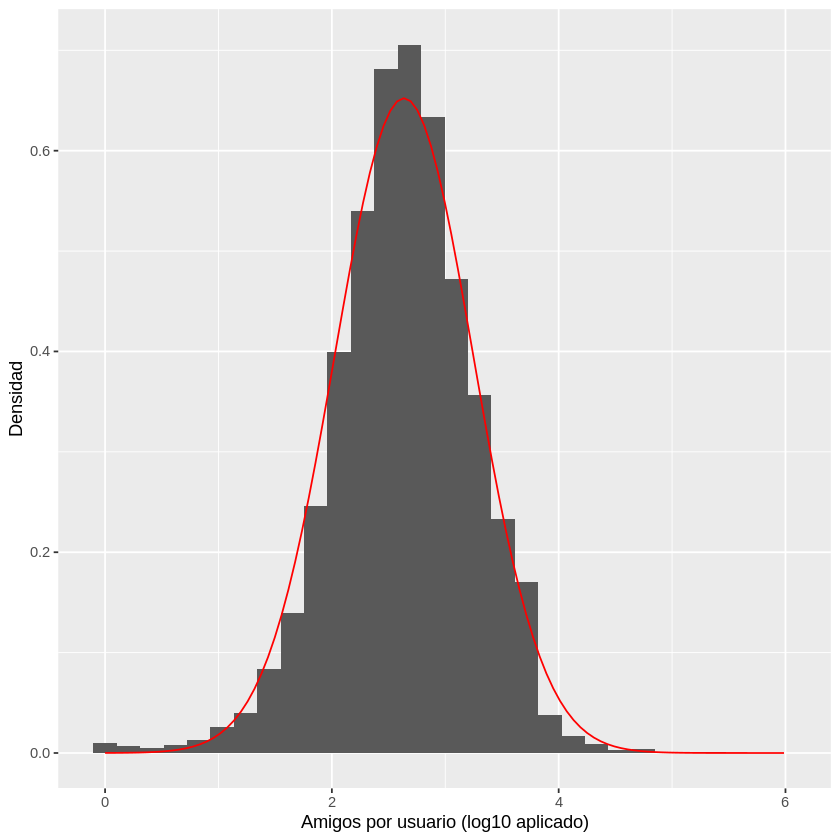

[1] 70.74836

[1] -0.3012228

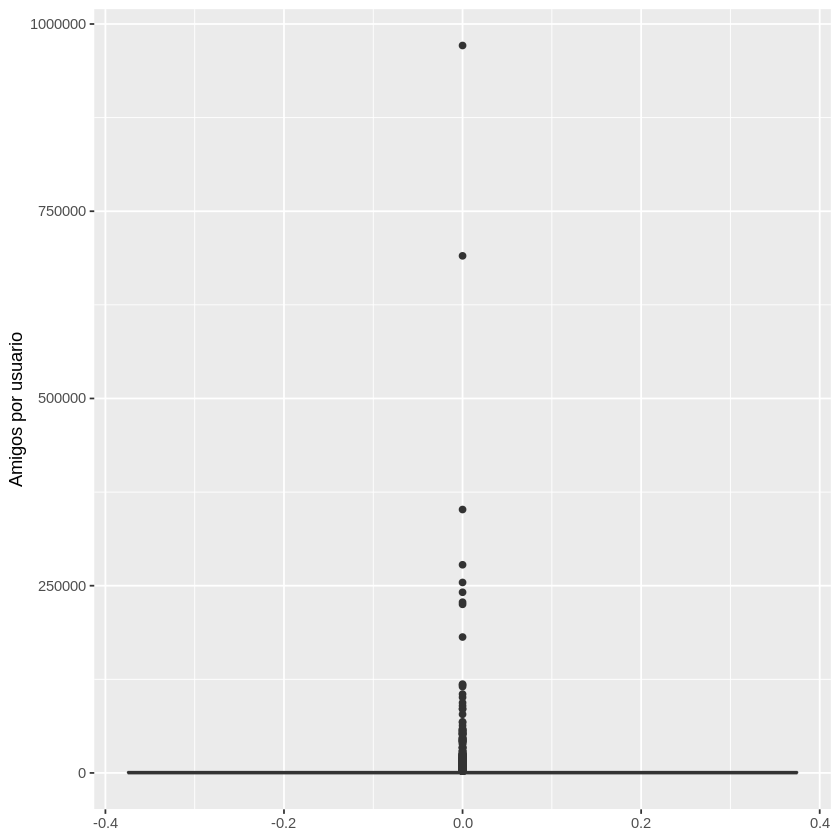

In [ ]:
# Con esto probamos que esta todo sesgado a la izquierda
 
 ggplot(Users, aes(x = log10(friends_count +1))) +
        geom_histogram(aes(y = ..density..))+
         stat_function(fun = dnorm, colour = "red",
                      args = list(mean = mean(log10(Users$friends_count + 1)),
                                 sd = sd(log10(Users$friends_count + 1)))) +
         labs( y ="Densidad", x = "Amigos por usuario (log10 aplicado)" )


# ggplot(Users, aes(x = friends_count )) +
#         geom_histogram(aes(y = ..density..), binwidth = 100)+
#          stat_function(fun = dnorm, colour = "red",
#                       args = list(mean = mean(Users$friends_count ),
#                                  sd = sd(Users$friends_count )))                                 
# plot(table(Users$listed_count))
# plot(table(Users$statuses_count))
# plot(table(Users$favourites_count))
ggplot(data = Users) +
geom_boxplot(mapping = aes(friends_count)) +
coord_flip()  + 
labs( x ="Amigos por usuario")


skewness(Users$friends_count)  # Es
skewness(log10(Users$friends_count+1))

# Agregamos un histogreama normal y otro escalado  de la misma variable

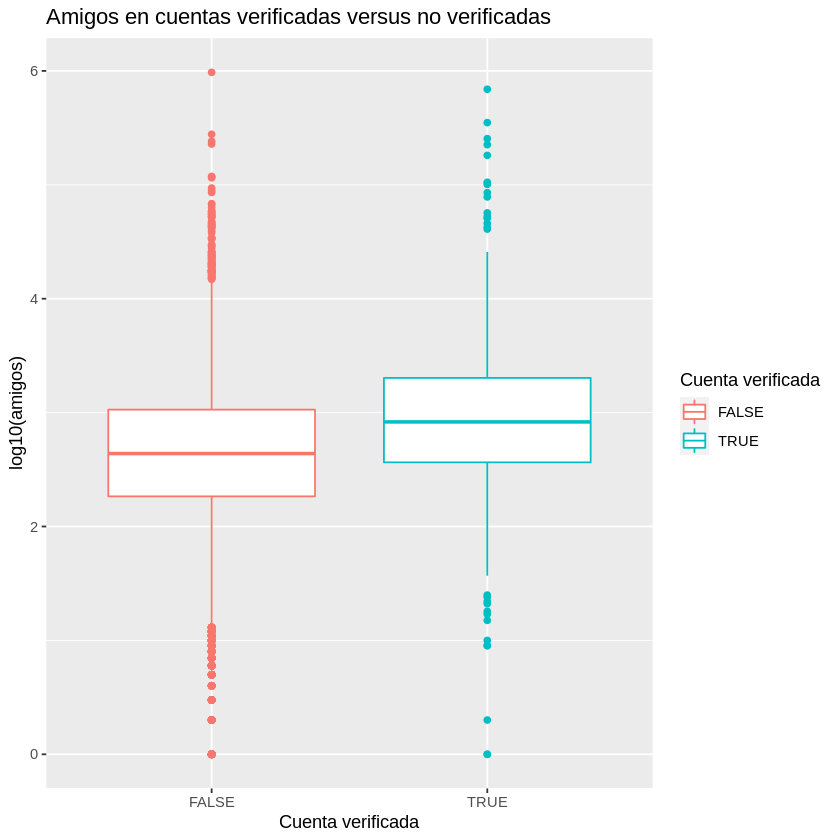

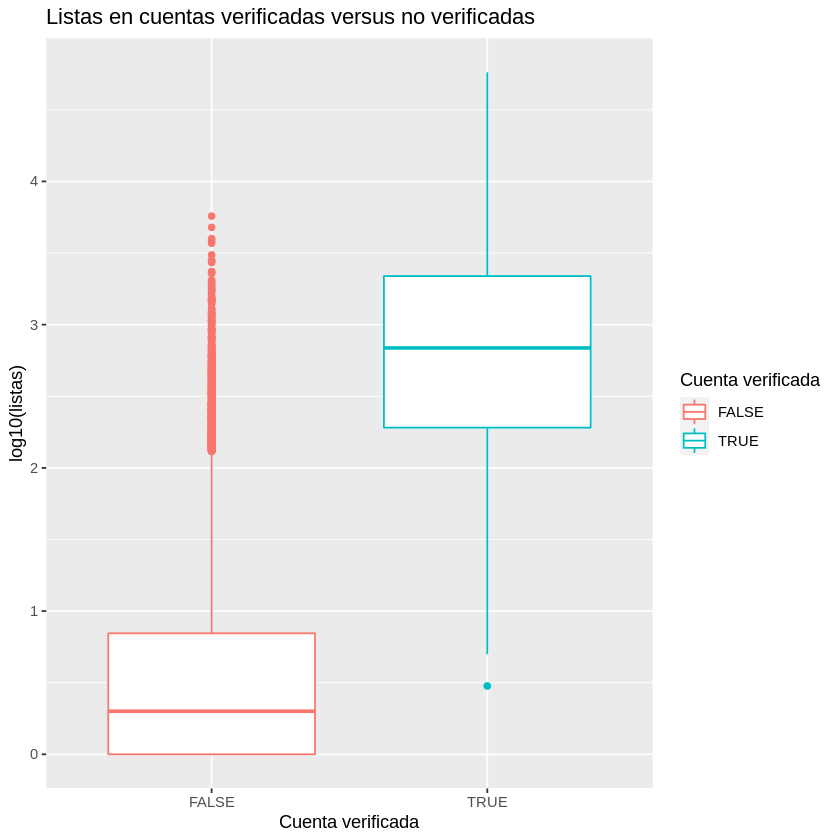

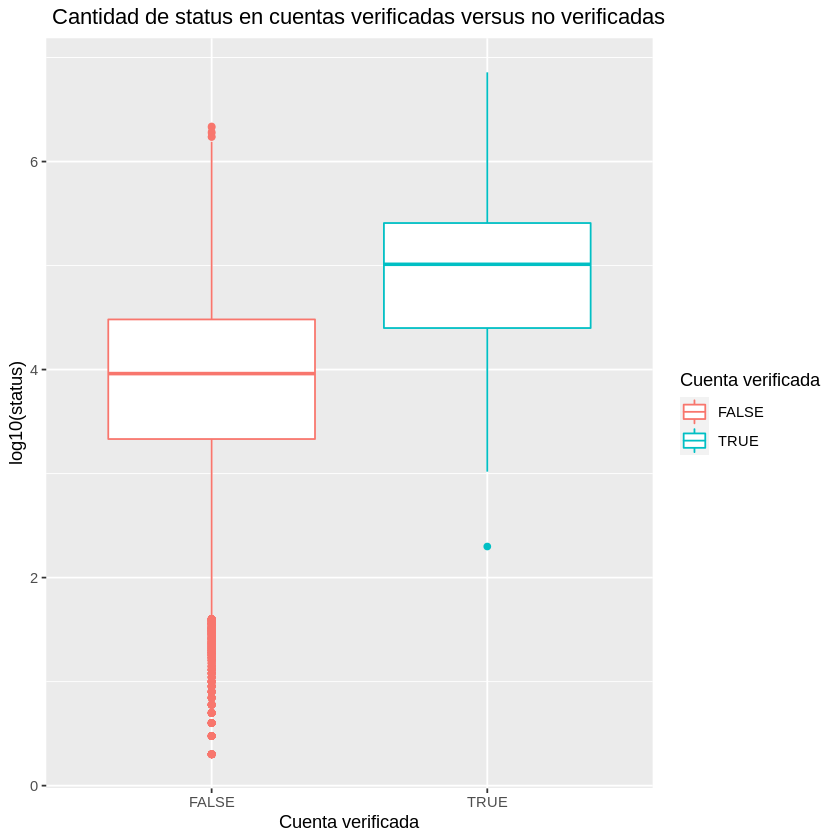

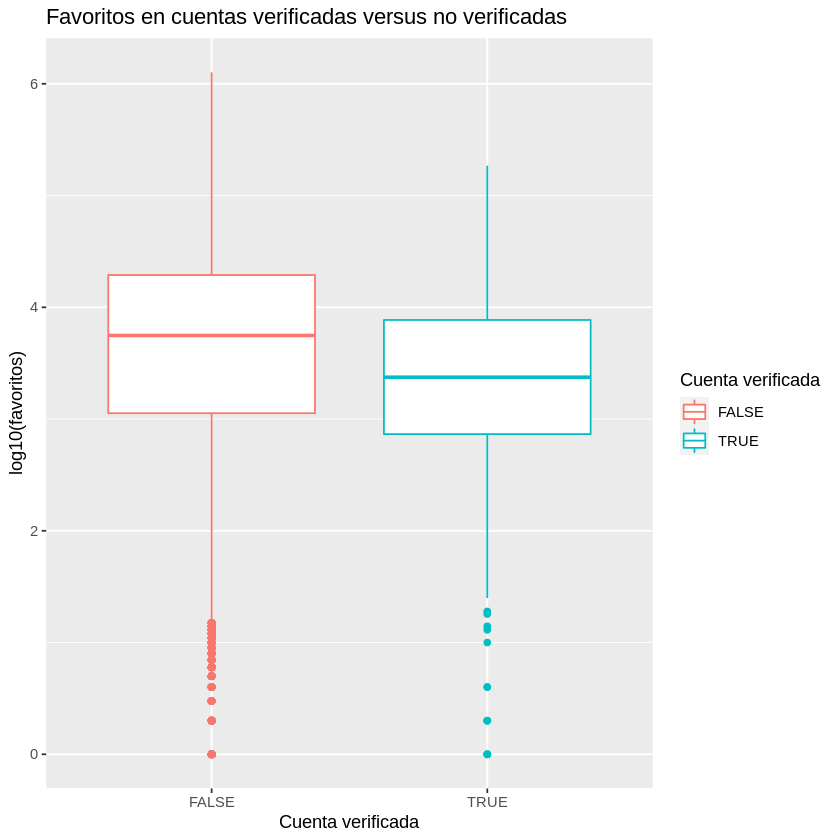

In [ ]:
ggplot(data = Users) +
geom_boxplot(mapping = aes(log10(friends_count +1), verified, color = verified)) +
coord_flip() +
labs(title="Amigos en cuentas verificadas versus no verificadas", x ="log10(amigos)", y = "Cuenta verificada", color = "Cuenta verificada")

ggplot(data = Users) +
geom_boxplot(mapping = aes(log10(listed_count +1), verified, color = verified)) +
coord_flip() +
labs(title="Listas en cuentas verificadas versus no verificadas", x ="log10(listas)", y = "Cuenta verificada", color = "Cuenta verificada")
ggplot(data = Users) +
geom_boxplot(mapping = aes(log10(statuses_count +1), verified, color = verified)) +
coord_flip() +
labs(title=" Cantidad de status en cuentas verificadas versus no verificadas", x ="log10(status)", y = "Cuenta verificada", color = "Cuenta verificada")
ggplot(data = Users) +
geom_boxplot(mapping = aes(log10(favourites_count +1), verified, color = verified)) +
coord_flip() +
labs(title="Favoritos en cuentas verificadas versus no verificadas", x ="log10(favoritos)", y = "Cuenta verificada", color = "Cuenta verificada")
 





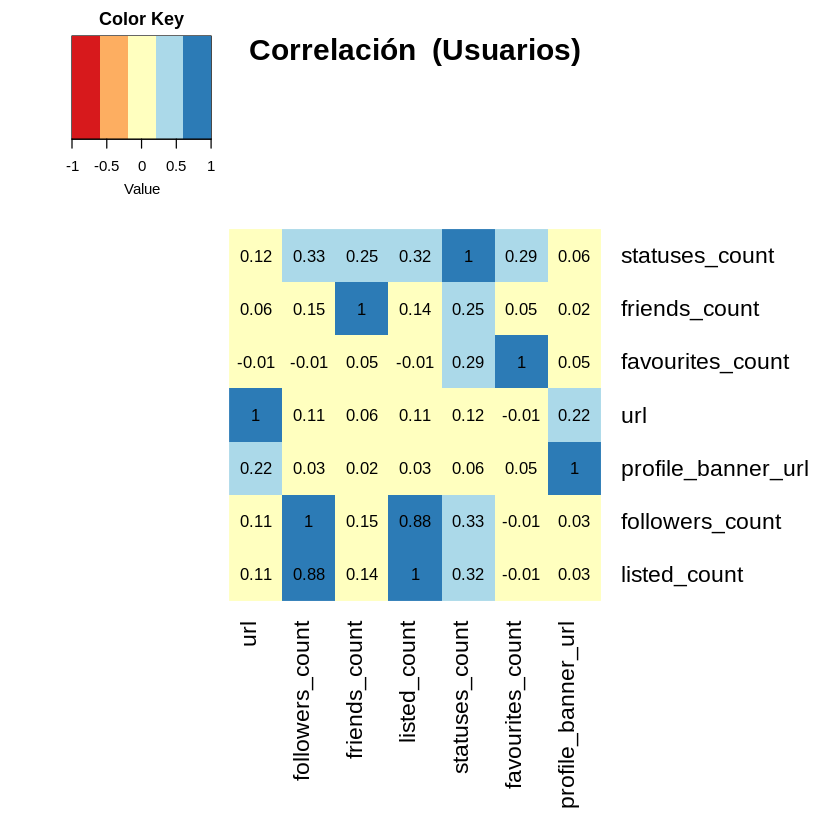

Warning message:
“Removed 143 rows containing missing values (geom_point).”


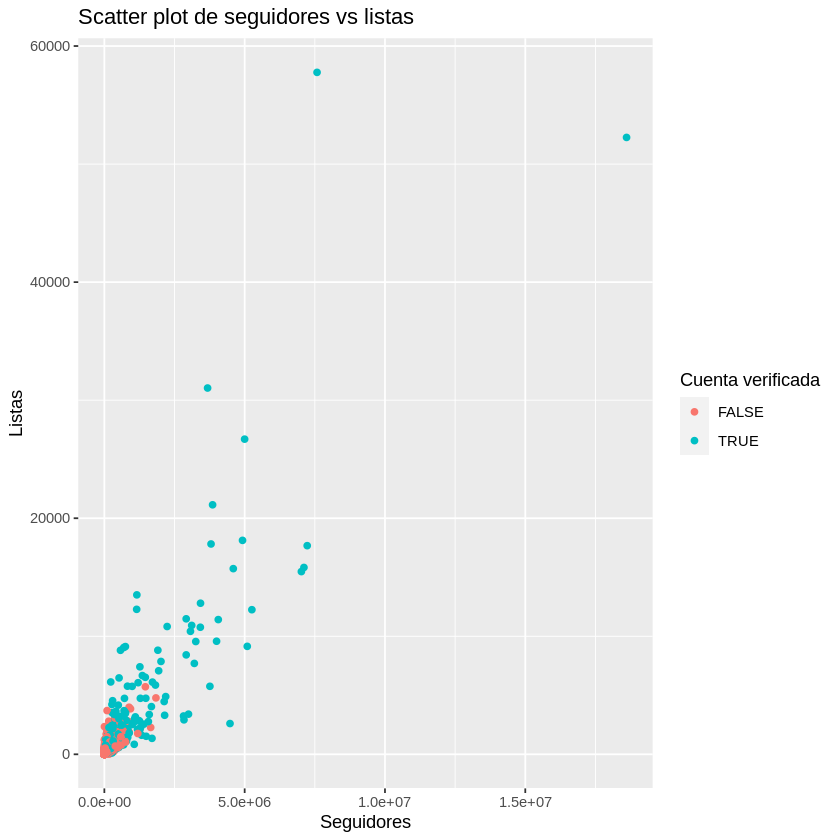

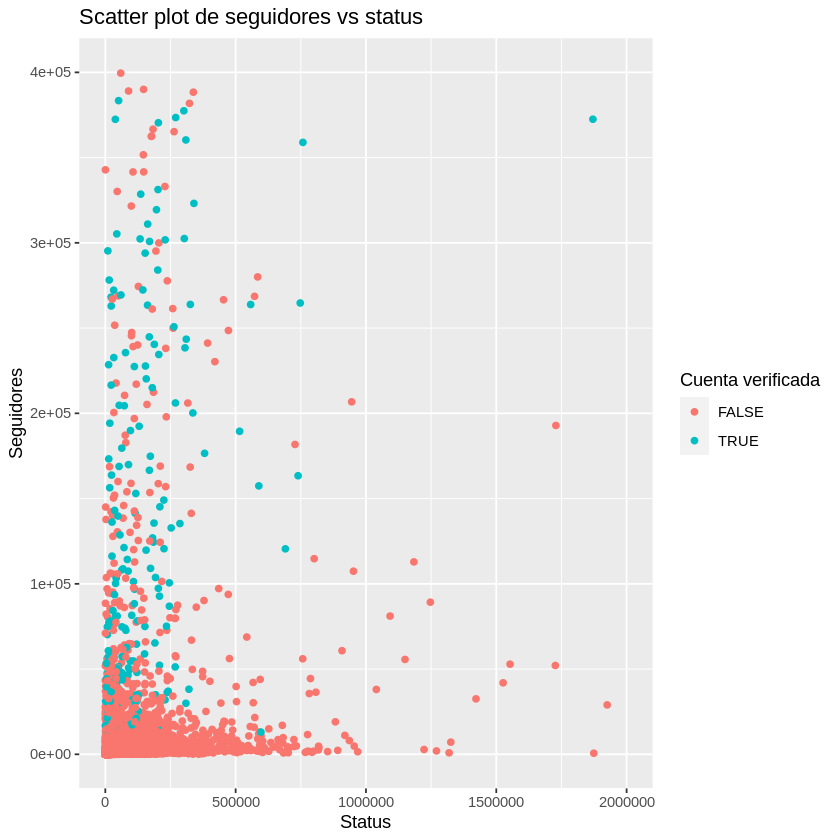

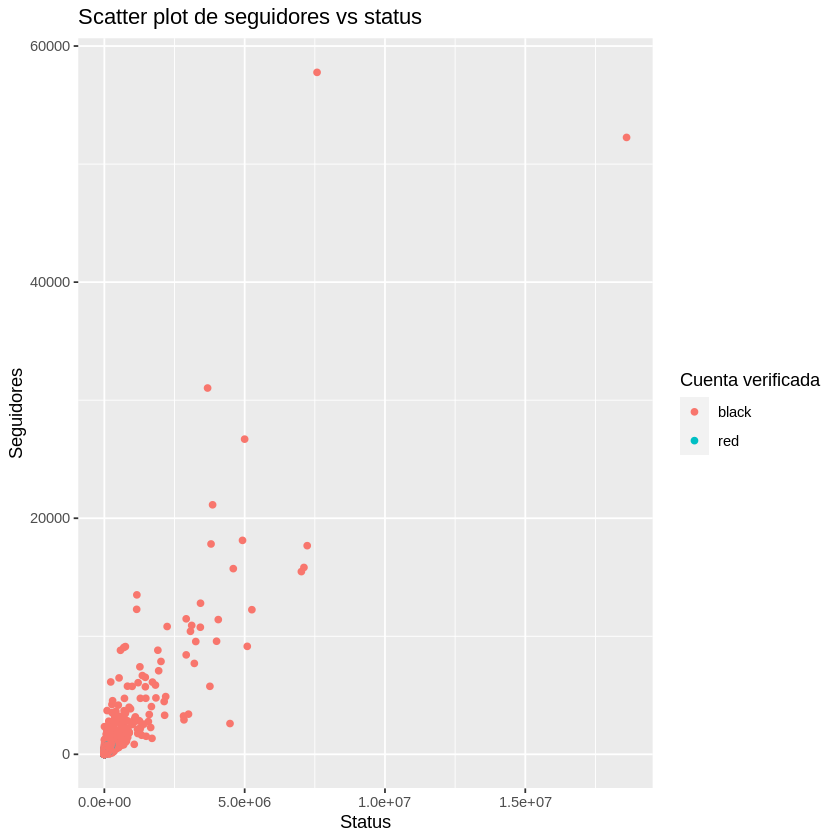

In [ ]:
Users_num <- Users[colnames(Users[unlist(lapply(Users, is.numeric))])] %>%
             select(-c("user_id","profile_image_url","profile_background_url"))

ds.cor = cor(Users_num)
heatmap.2(ds.cor,
          cellnote = round(ds.cor,2), 
          main = "Correlación  (Usuarios)",
          notecol="black",     
          density.info="none", 
          trace="none",        
          margins =c(12,12),    
          col=brewer.pal('RdYlBu', n=5),  
          dendrogram="none",     
          Colv="NA")   
#corrplot(cor(Users_num[Users$verified,]), method="number", type= "upper", title= "Correlación para usuarios verificados")
#corrplot(cor(Users_num[-Users$verified,]), method="number", type= "upper", title= "Correlación para no verificados")

#cor(Users_num[Users$verified,])            # Hay correlación entre followers y listas publicas que sigue el usuario

# Con el scatter plot confirmamos lo que se vio en la correlación, se muestra otra correlación baja para ver la diferencia.
ggplot(Users, aes(x=followers_count,y=listed_count, colour = verified)) + 
       geom_point(position = position_dodge(width = .3)) + 
       #xlim(0,8000000) + ylim(0,40000)+ # Hay 2 outliers
       labs(title="Scatter plot de seguidores vs listas ", x = "Seguidores", y = "Listas", color = "Cuenta verificada")

ggplot(Users, aes(x=statuses_count,y=followers_count, colour = verified)) +
       geom_point(position = position_dodge(width = .3)) + 
       xlim(0,2000000) + ylim(0,400000) +
       labs(title="Scatter plot de seguidores vs status ", x = "Status", y = "Seguidores", color = "Cuenta verificada")

Data <- Users %>% select(c("followers_count","listed_count"))
mahalanobis <- mahalanobis(Data,colMeans(Data),cov(Data))
Data  <- Data[order(mahalanobis,decreasing=TRUE),]
umbral<-1
Data$outlier <- (mahalanobis>umbral)
Data$color <- ifelse(Data$outlier, "red", "black")

ggplot(Data, aes(x=followers_count,y=listed_count, colour = color)) +
       geom_point(position = position_dodge(width = .3)) + 
       labs(title="Scatter plot de seguidores vs status ", x = "Status", y = "Seguidores", color = "Cuenta verificada")


# Ponemos los 3 gráficos
# Adjuntamos un calculo de la distancia en los outliers de la variable correlacion

# Análisis de Tweets


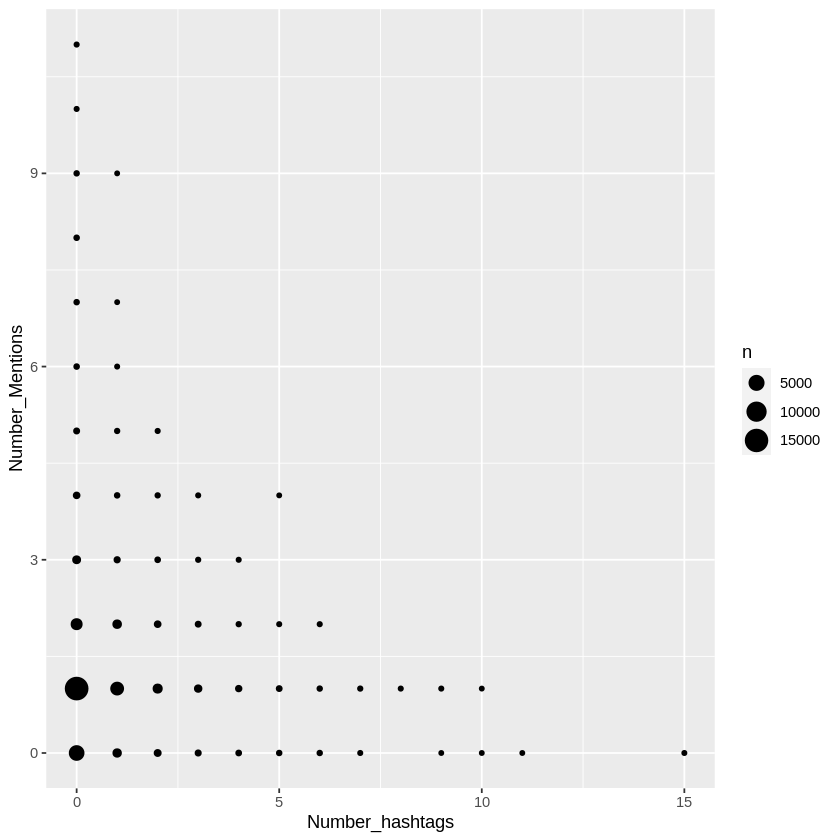

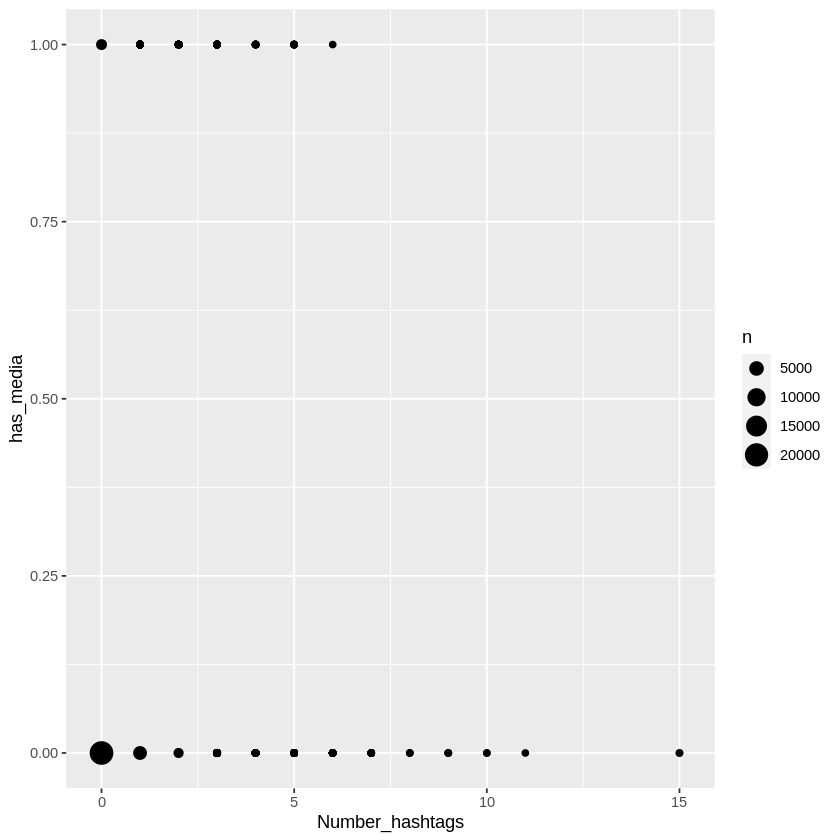

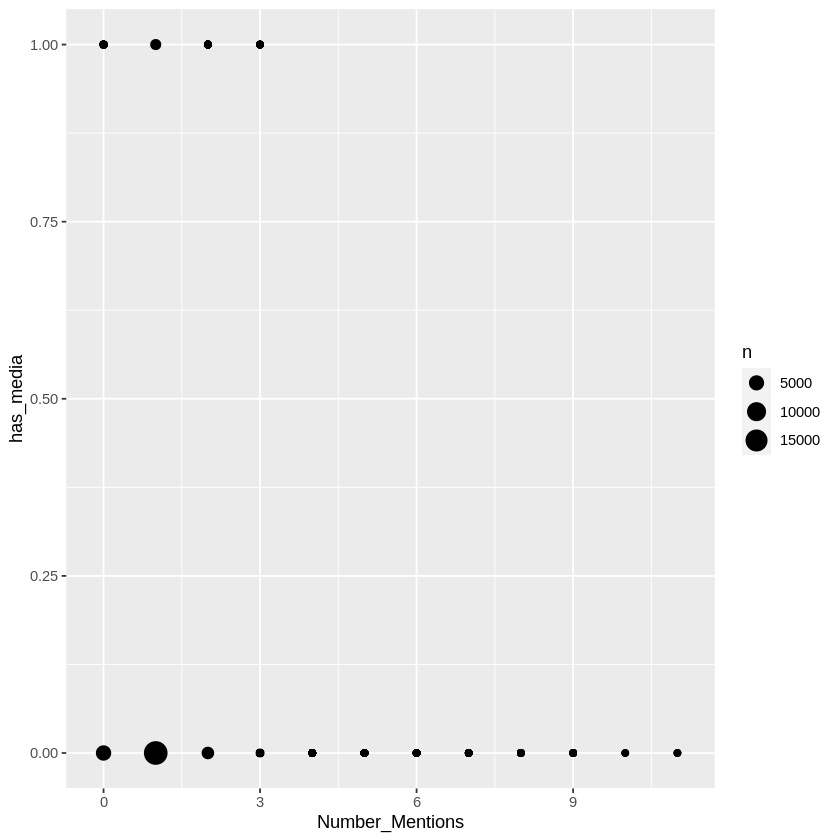

In [ ]:
ggplot(Tweets, aes(x=Number_hashtags,y=Number_Mentions)) + geom_count()
ggplot(Tweets, aes(x=Number_hashtags,y=has_media)) + geom_point(position = position_dodge(width = .3)) + geom_count()  # No hay relación
ggplot(Tweets, aes(x=Number_Mentions,y=has_media)) + geom_point(position = position_dodge(width = .3)) + geom_count()  # No hay relación



# No se encontro relación de las variables generadas de hastags, menciones , tiene multimedia, etc con el resto del dataset.

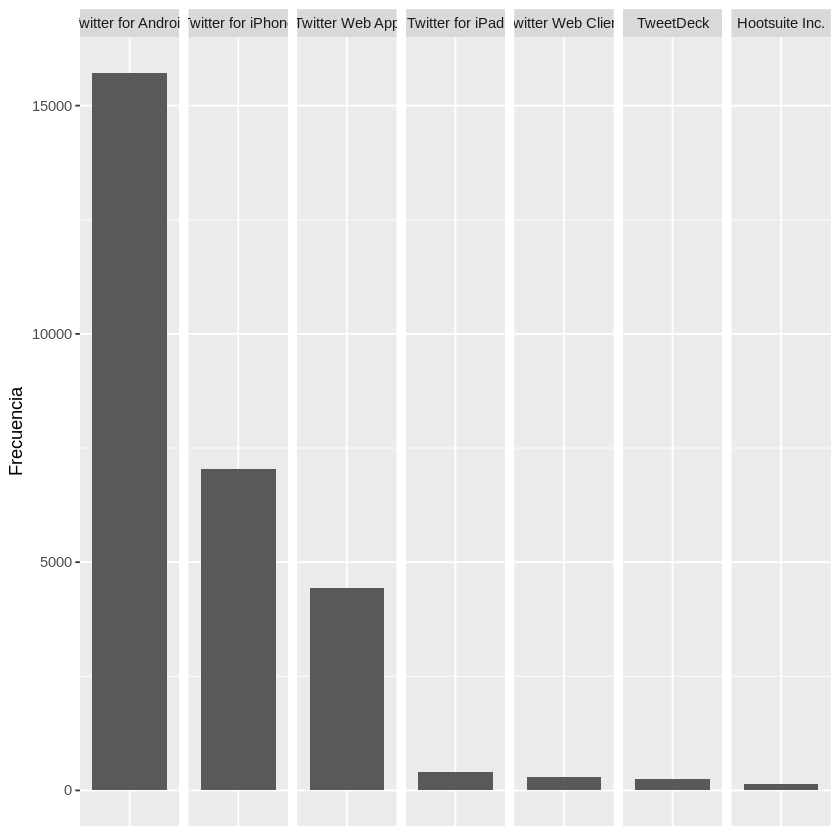

In [ ]:
# Tweets por plataforma usada
Sources = data.frame(sort(table(Tweets$source),decreasing=TRUE)[1:7])
colnames(Sources) = c("Fuente","Frecuencia")

ggplot(Sources, aes(x=Fuente, y=Frecuencia)) +  
        geom_bar(stat = 'identity') + 
        facet_grid(~Fuente,scales = "free") +
        theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank())

# Lo  sumamos

[1]  2 10

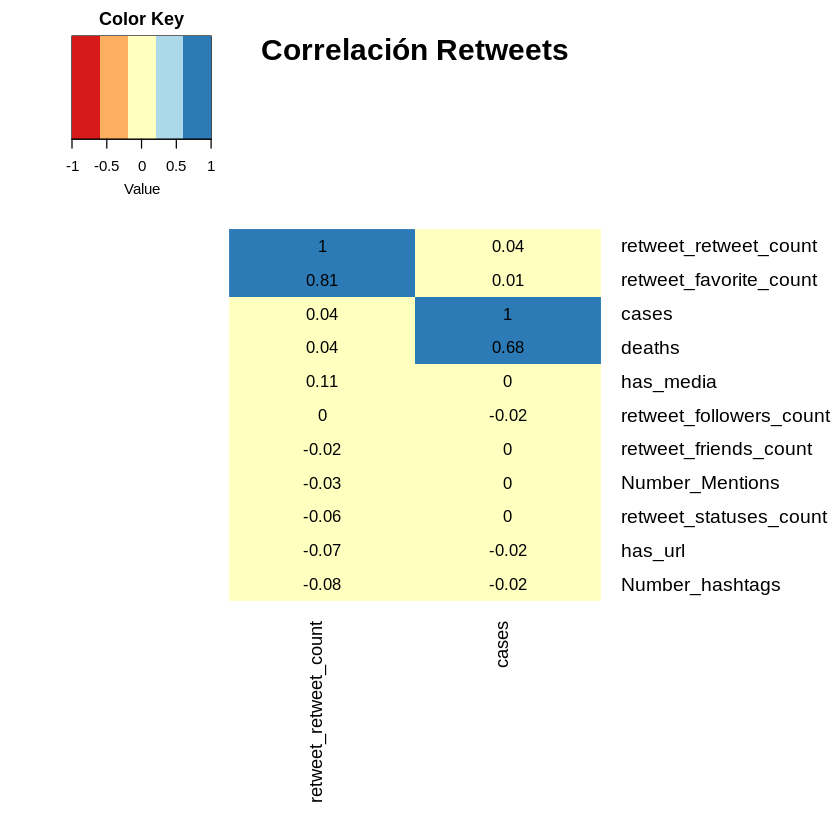

Warning message:
“Removed 7621 rows containing missing values (geom_point).”


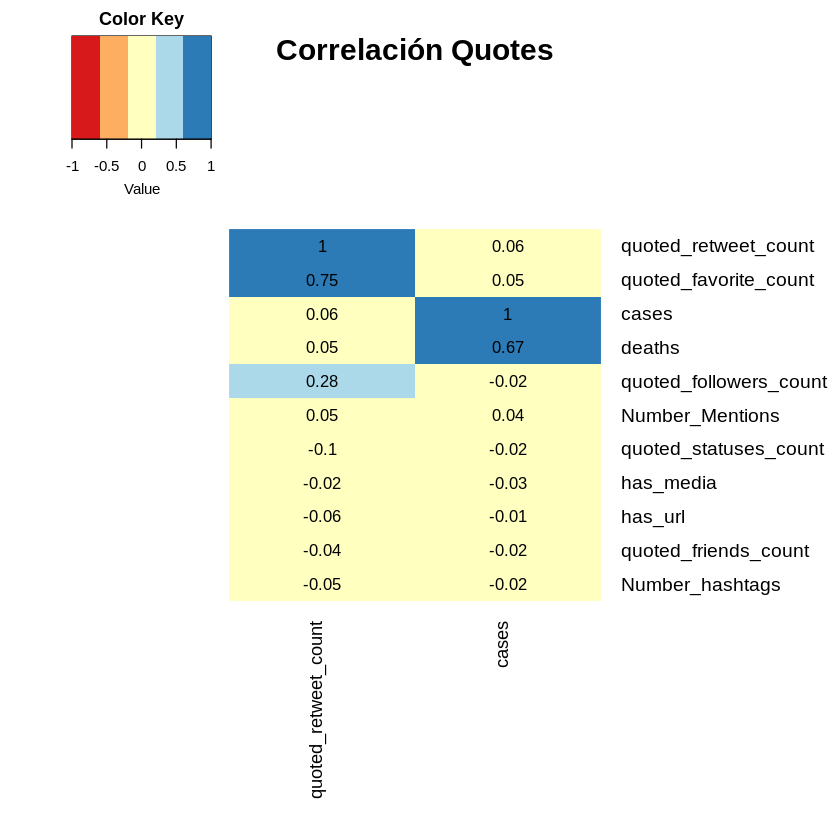

Warning message:
“Removed 23702 rows containing missing values (geom_point).”


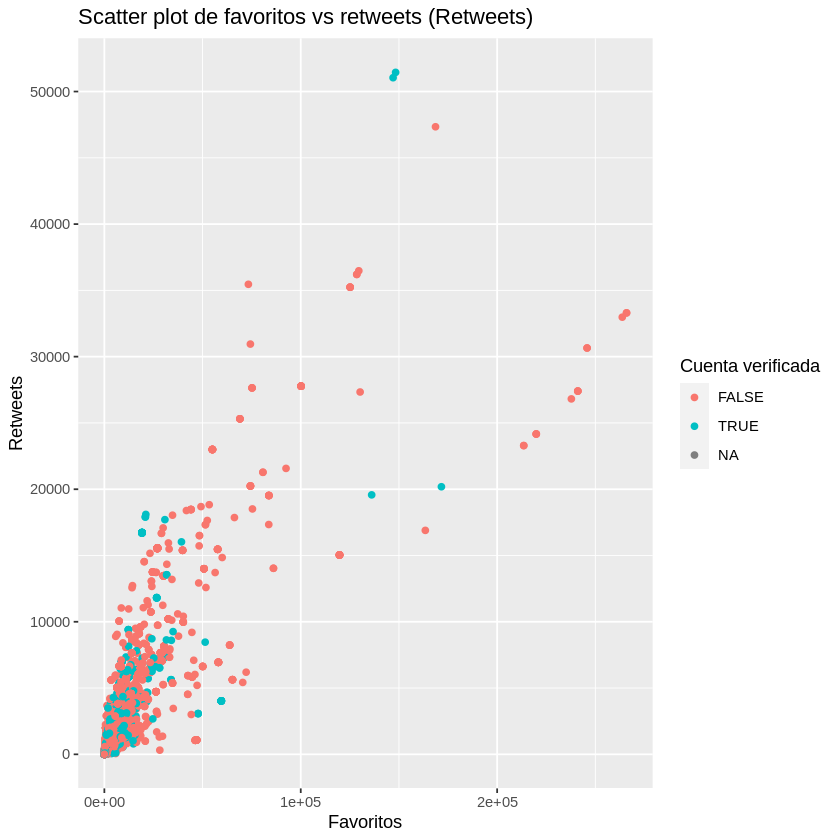

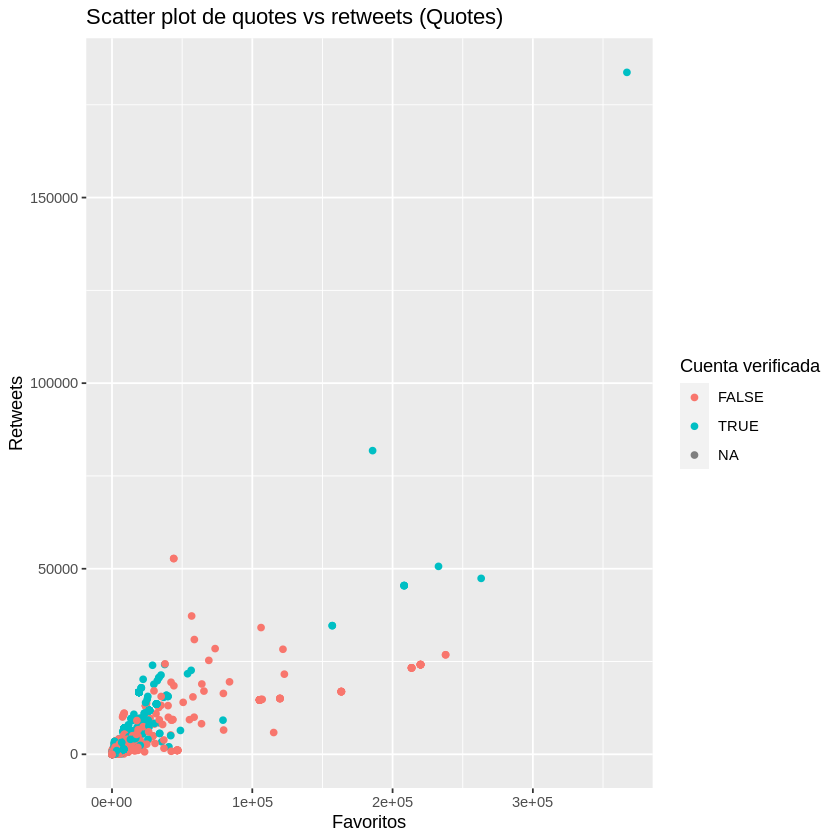

In [ ]:
ReTweets_num <- Tweets[Tweets$is_retweet,colnames(Tweets[unlist(lapply(Tweets, is.numeric))])] %>% 
             select(-c("fear","other","sadness","love","anger","joy","surprise","favorite_count","retweet_count","user_id","status_id","retweet_status_id","retweet_user_id","quoted_status_id","quoted_user_id","reply_to_user_id","reply_to_status_id")) %>%
             select(., -starts_with("quoted"))
          

QuoteTweets_num <- Tweets[Tweets$is_quote,colnames(Tweets[unlist(lapply(Tweets, is.numeric))])] %>% 
             select(-c("fear","other","sadness","love","anger","joy","surprise","favorite_count","retweet_count","user_id","status_id","retweet_status_id","retweet_user_id","quoted_status_id","quoted_user_id","reply_to_user_id","reply_to_status_id")) %>%
             select(., -starts_with("retweet"))

Tweets_num <- Tweets[!Tweets$is_quote & !Tweets$is_retweet,colnames(Tweets[unlist(lapply(Tweets, is.numeric))])] %>% 
             select(-c("favorite_count","retweet_count","user_id","status_id","retweet_status_id","retweet_user_id","quoted_status_id","quoted_user_id","reply_to_user_id","reply_to_status_id")) %>%
             select(., -starts_with("retweet")) %>%
             select(., -starts_with("quote"))


ReTweets.cor = cor(ReTweets_num) 
aux = findCorrelation(ReTweets.cor, cutoff=0.5) # putt any value as a "cutoff" 
aux = sort(aux)
ReTweets.cor = ReTweets.cor[,c(aux)]           


QuoteTweets.cor = cor(QuoteTweets_num) 
aux = findCorrelation(QuoteTweets.cor, cutoff=0.5) # putt any value as a "cutoff" 
aux = sort(aux)
aux
QuoteTweets.cor = QuoteTweets.cor[,c(aux)]  

Tweets.cor = cor(Tweets_num) 
aux = findCorrelation(Tweets.cor, cutoff=0.5) # putt any value as a "cutoff" 
aux = sort(aux)
Tweets.cor = Tweets.cor[,c(aux)]   

heatmap.2(ReTweets.cor,
          cellnote = round(ReTweets.cor,2), 
          main = "Correlación Retweets",
          notecol="black",     
          density.info="none", 
          cexCol = 1.1 ,
          trace="none",        
          margins =c(12,12),    
          col=brewer.pal('RdYlBu', n=5),  
          dendrogram="none",     
          Colv="NA") 
        
heatmap.2(QuoteTweets.cor,
          cellnote = round(QuoteTweets.cor,2), 
          main = "Correlación Quotes",
          notecol="black",     
          density.info="none", 
          trace="none",      
          cexCol = 1.1 ,  
          margins =c(12,12),    
          col=brewer.pal('RdYlBu', n=5),  
          dendrogram="none",     
          Colv="NA",) 

# Scatter plots
ggplot(Tweets, aes(x=retweet_favorite_count,y=retweet_retweet_count, colour = retweet_verified)) + 
       geom_point(position = position_dodge(width = .3)) +
      labs(title="Scatter plot de favoritos vs retweets (Retweets) ", x = "Favoritos", y = "Retweets", color = "Cuenta verificada")
ggplot(Tweets, aes(x=quoted_favorite_count,y=quoted_retweet_count, colour = quoted_verified)) +
       geom_point(position = position_dodge(width = .3)) +
        labs(title="Scatter plot de quotes vs retweets (Quotes) ", x = "Favoritos", y = "Retweets", color = "Cuenta verificada")
#ggplot(Tweets, aes(x=cases,y=deaths)) + geom_point(position = position_dodge(width = .3)) 



# Eliminar los sentimientos
# Hacer un plot de muertes y casos  ???
# Mostrar scatter plot de retweets y mencionar que no esta segmentado


# Análisis para hashtags

In [ ]:
head(df_hashtag_info)

,hashtag,count,unique_user_count,user_count,Mean,Min_date,mean_timeWindow,hashtag_group,grouped
,<fct>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>,<int>
1,COVID19,1493,1368,1493,106.64286,4/25/2020,74.65,COVID19,1
2,coronavirus,465,445,465,35.76923,4/25/2020,23.25,Coronavirus,1
3,COVID?19,283,274,283,23.58333,5/2/2020,14.15,COVID19,1
4,Covid19,264,247,264,20.30769,4/30/2020,13.20,COVID19,1
5,Coronavirus,243,222,243,18.69231,4/30/2020,12.15,Coronavirus,1
6,cuarentena,140,133,140,10.00000,4/25/2020,7.00,Cuarentena,1


Sección utilizada para demostrar que la diferencia entre la media tradicional y la media por toda la ventana de tiempo

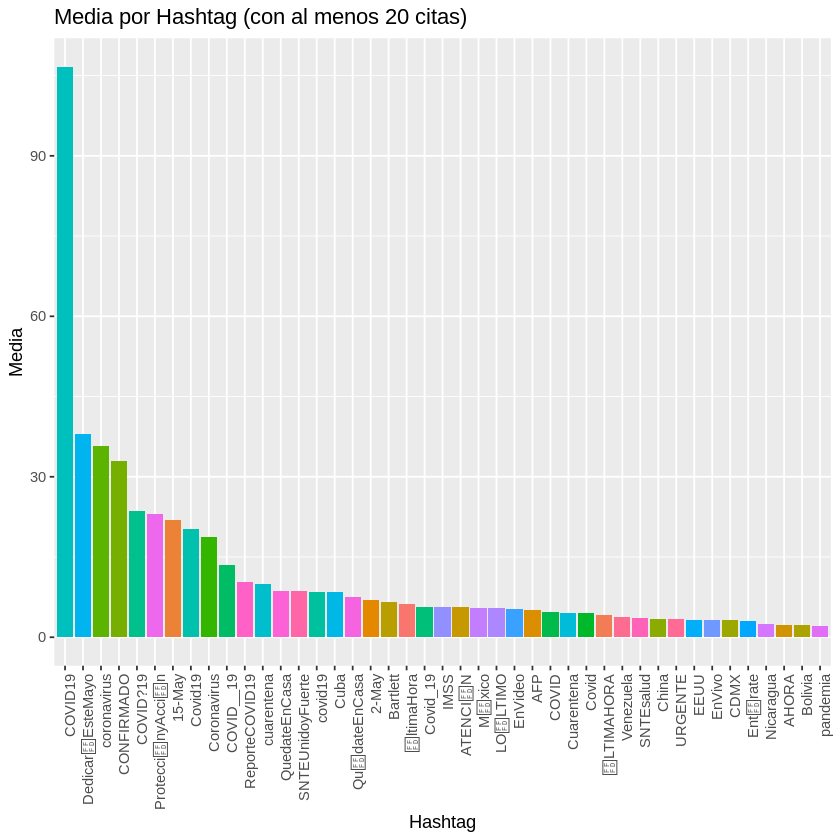

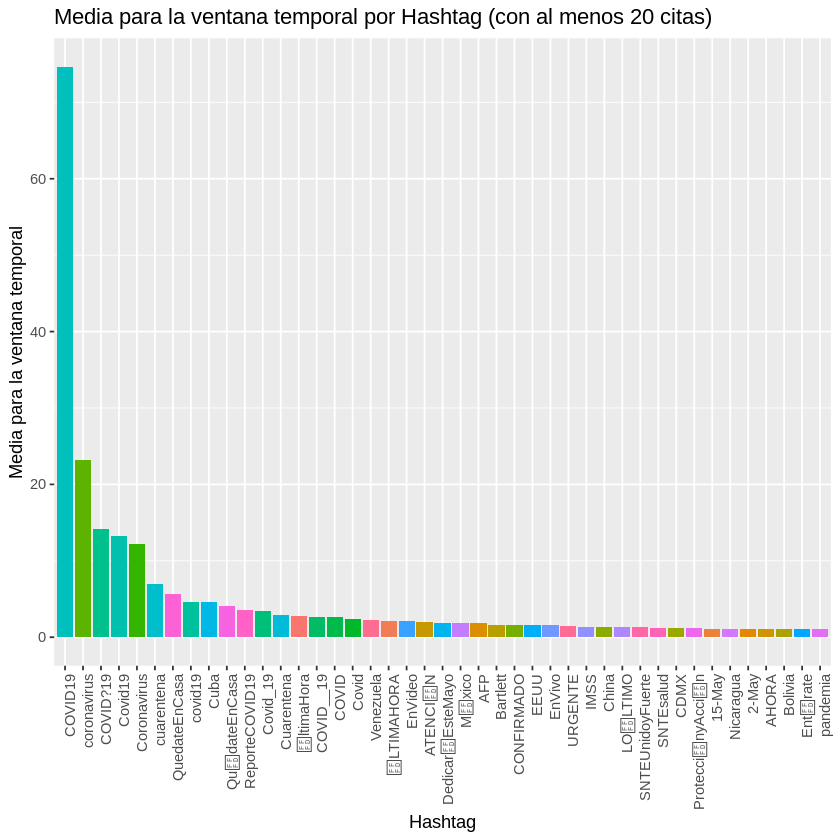

In [ ]:
#Gráfico para ilustrar por qué la media puede ser una medida sesgada para estimar popularidad
#utilizando media
filter(df_hashtag_info, count > 20) %>%
ggplot(data=.) +
  geom_bar(mapping = aes(x = reorder(hashtag, -Mean), y = Mean, fill = hashtag, ), stat = 'identity', show.legend = FALSE) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title="Media por Hashtag (con al menos 20 citas)", x ="Hashtag", y = "Media")

#utilizando mean_timeWindow
filter(df_hashtag_info, count > 20) %>%
ggplot(data=.) +
  geom_bar(mapping = aes(x = reorder(hashtag, -mean_timeWindow), y = mean_timeWindow, fill = hashtag, ), stat = 'identity', show.legend = FALSE) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title="Media para la ventana temporal por Hashtag (con al menos 20 citas)", x ="Hashtag", y = "Media para la ventana temporal")

Data Preparation para que sea más fácil unir los datasets

In [ ]:
#Renombro las columnas para que sea más sencillo realizar los joins
names(df_hashtag_over_time)[1] <-paste("date")
names(df_hashtag_over_time)[2] <-paste("hashtag")
names(df_hashtag_over_time)[3] <-paste("date_count")

In [ ]:
#Hashtag con el count por hashtag_group para poder filtrar los realmente populares
df_hashtag_info_grouped <- select(df_hashtag_info, hashtag_group, count) %>%
group_by(hashtag_group) %>%
summarise(group_count = sum(count))

head(df_hashtag_info_grouped)

,group_count
,<int>
1,9636


In [ ]:
#uno ambos datasets para poder analizar la progresion de los hashtags mas populares. 
#Posteriormente me quedo únicamente con aquellos cuyo hashtag_group se haya utilizado al menos 100 veces
df_complete_hashtags <- inner_join(df_hashtag_over_time, df_hashtag_info, by = 'hashtag') %>%
inner_join(., df_hashtag_info_grouped, by = 'hashtag_group') %>%
select(date, hashtag, date_count, group_count, hashtag_group, grouped) %>%
group_by(date, group_count, hashtag_group, grouped) %>%
summarise(date_count = sum(date_count))

Warning message:
“Column `hashtag` joining factors with different levels, coercing to character vector”


ERROR: ignored

In [ ]:
data_plot <- filter(df_complete_hashtags, hashtag_group !=  'COVID19'& hashtag_group != 'Coronavirus') %>%
filter(., group_count > 100)

ggplot(data = data_plot, aes(x = date, y = date_count, group = hashtag_group)) +
  geom_line(aes(color = hashtag_group)) + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title="Mención de Grupo de Hashtags (con al menos 100 citas en el período)", x ="Fecha", y = "Veces utilizado", color = "Grupo de Hashtag")

ERROR: ignored

# Análisis de sentimientso/Hashtags

In [ ]:
head(Tweets)

In [ ]:
#1) agrupo por día los sentimeintos que tenemos el el DF de tweets
sentiments_by_day <- select(Tweets, created_at, love, joy, surprise, anger, sadness, fear, other) %>%
group_by(created_at, love, joy, surprise, anger, sadness, fear, other) %>%
summarise(count = 1) #necesario para que me los agrupe

#2) normalizo por fila (es decir, por día)
sents_normalized <- t(scale(t(sentiments_by_day[,-c(1,9)]))) 
sents_normalized <- cbind(sentiments_by_day[1], sents_normalized)
#solo para confirmar que la media es 0 y el desvio estandar es 1
# apply(sents_normalized[,-1], 1, mean) 
# apply(sents_normalized[,-1], 1, sd)

#3) el formato actual no me sirve para plotear, así que los di vuelta
df_love <- cbind(sents_normalized[c(1,2)], rep('Love', nrow(sents_normalized)))
df_joy <- cbind(sents_normalized[c(1,3)], rep('Joy', nrow(sents_normalized)))
df_surprise <- cbind(sents_normalized[c(1,4)], rep('Surprise', nrow(sents_normalized)))
df_anger <- cbind(sents_normalized[c(1,5)], rep('Anger', nrow(sents_normalized)))
df_sadness <- cbind(sents_normalized[c(1,6)], rep('Sadness', nrow(sents_normalized)))
df_fear <- cbind(sents_normalized[c(1,7)], rep('Fear', nrow(sents_normalized)))
df_other <- cbind(sents_normalized[c(1,8)], rep('Other', nrow(sents_normalized)))

names(df_love)[2] <- paste('normalized_count')
names(df_love)[3] <- paste('sentiment')
names(df_joy)[2] <- paste('normalized_count')
names(df_joy)[3] <- paste('sentiment')
names(df_surprise)[2] <- paste('normalized_count')
names(df_surprise)[3] <- paste('sentiment')
names(df_anger)[2] <- paste('normalized_count')
names(df_anger)[3] <- paste('sentiment')
names(df_sadness)[2] <- paste('normalized_count')
names(df_sadness)[3] <- paste('sentiment')
names(df_fear)[2] <- paste('normalized_count')
names(df_fear)[3] <- paste('sentiment')
names(df_other)[2] <- paste('normalized_count')
names(df_other)[3] <- paste('sentiment')

sents_normalized_t <- rbind(df_love, df_joy, df_surprise, df_anger, df_sadness, df_fear, df_other)

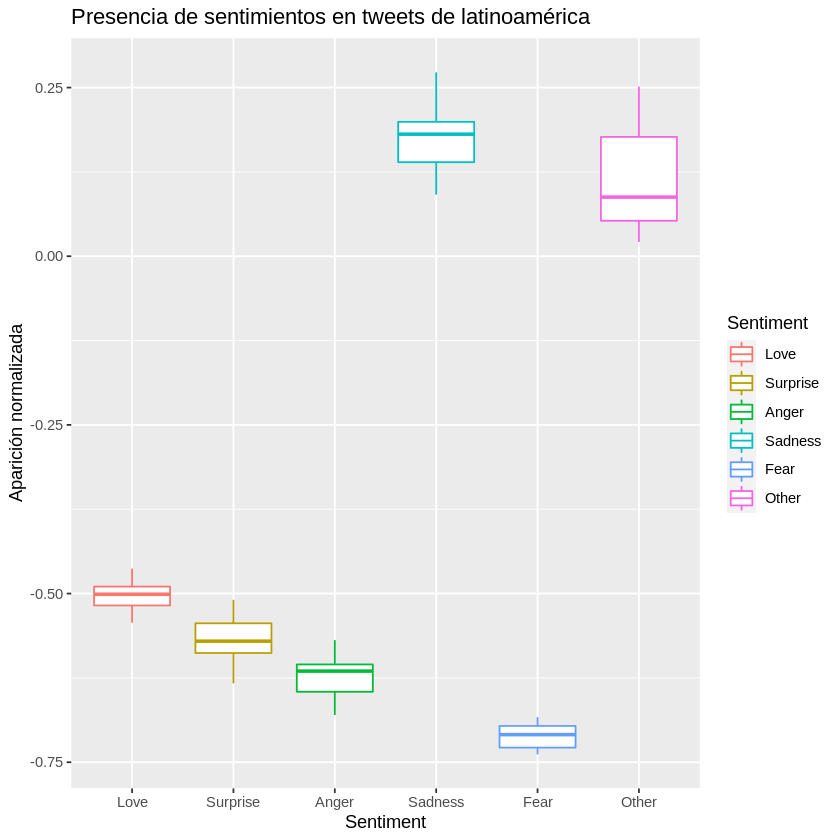

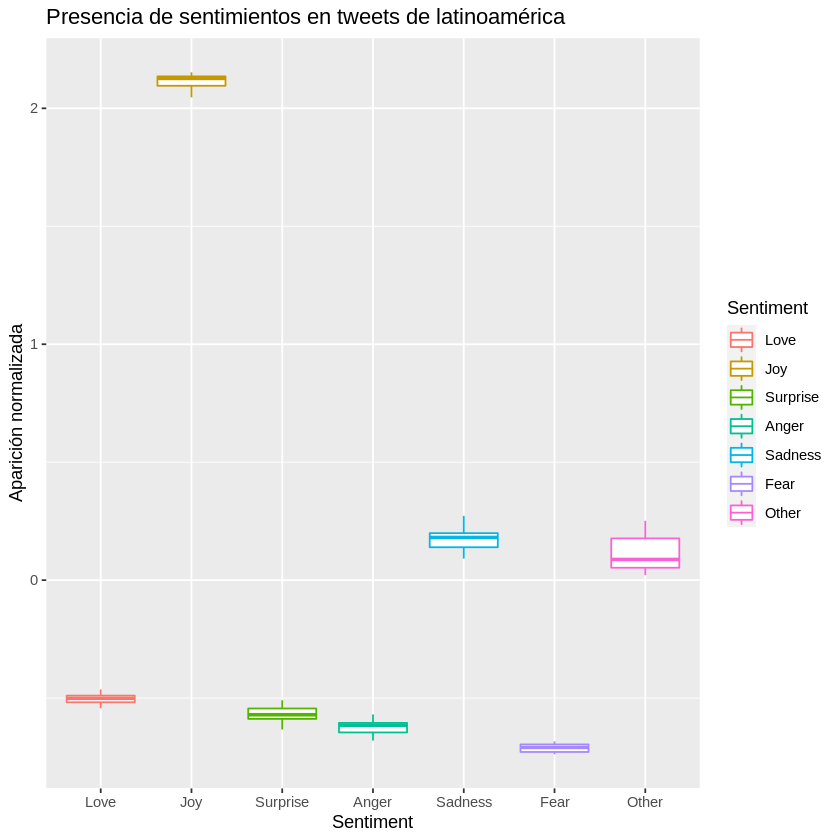

In [ ]:
ggplot(data = filter(sents_normalized_t, sentiment != 'Joy')) +
geom_boxplot(mapping = aes(normalized_count, sentiment, color = sentiment)) +
coord_flip() +
labs(title="Presencia de sentimientos en tweets de latinoamérica", y ="Sentiment", x = "Aparición normalizada", color = "Sentiment")

ggplot(data = sents_normalized_t) +
geom_boxplot(mapping = aes(normalized_count, sentiment, color = sentiment)) +
coord_flip()  + 
labs(title="Presencia de sentimientos en tweets de latinoamérica", y ="Sentiment", x = "Aparición normalizada", color = "Sentiment")


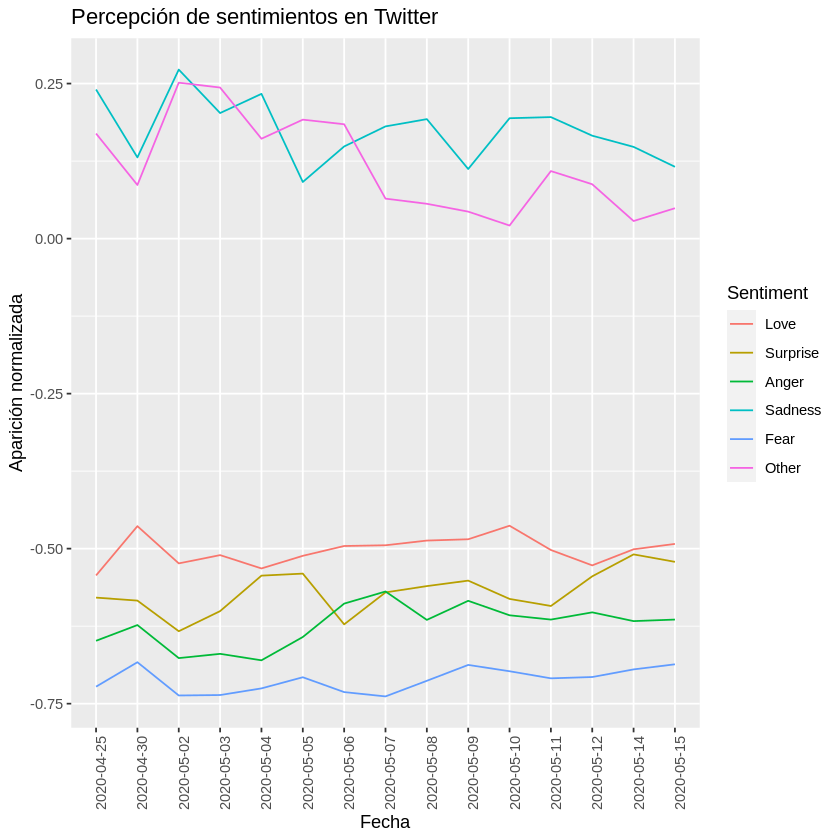

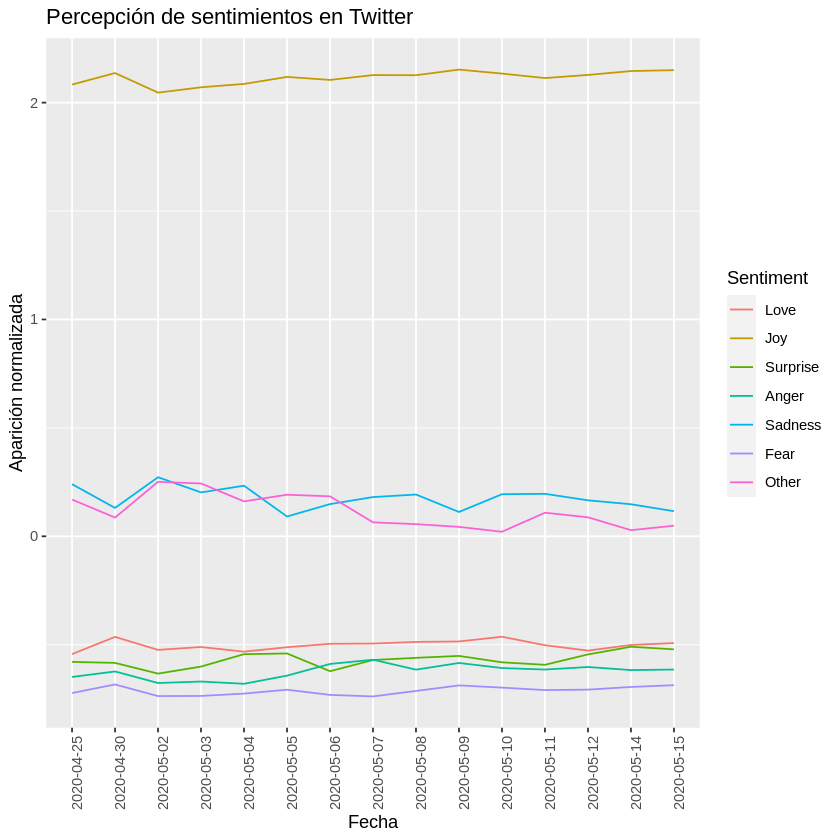

In [ ]:
ggplot(data = filter(sents_normalized_t, sentiment != 'Joy'), aes(x = created_at, y = normalized_count, group = sentiment)) +
  geom_line(aes(color = sentiment)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title="Percepción de sentimientos en Twitter", x ="Fecha", y = "Aparición normalizada", color = "Sentiment")

ggplot(data = sents_normalized_t, aes(x = created_at, y = normalized_count, group = sentiment)) +
  geom_line(aes(color = sentiment)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title="Percepción de sentimientos en Twitter", x ="Fecha", y = "Aparición normalizada", color = "Sentiment")

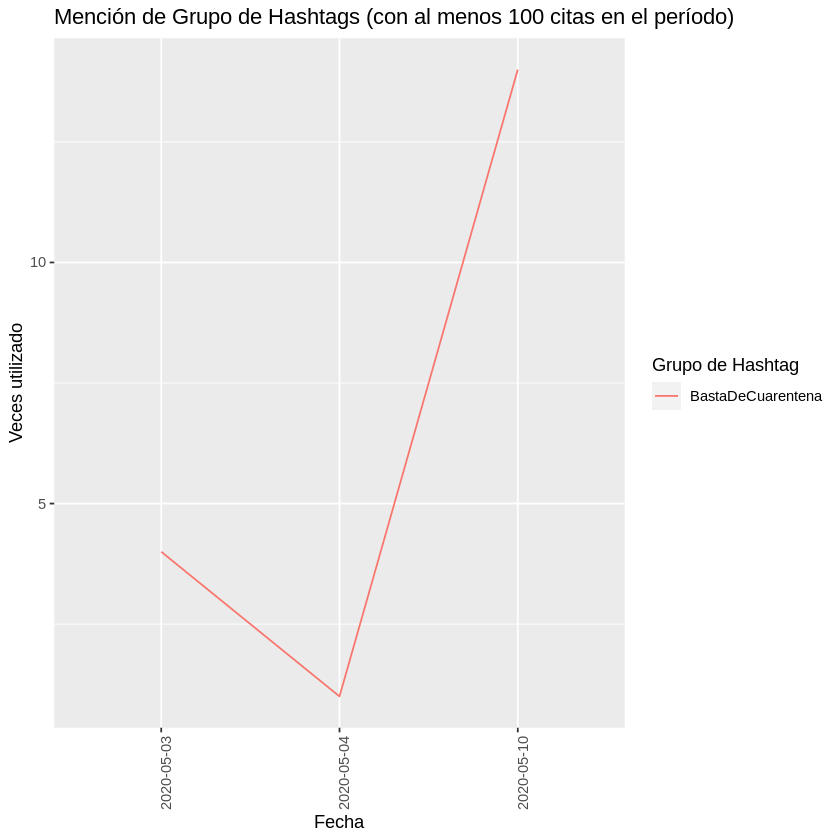

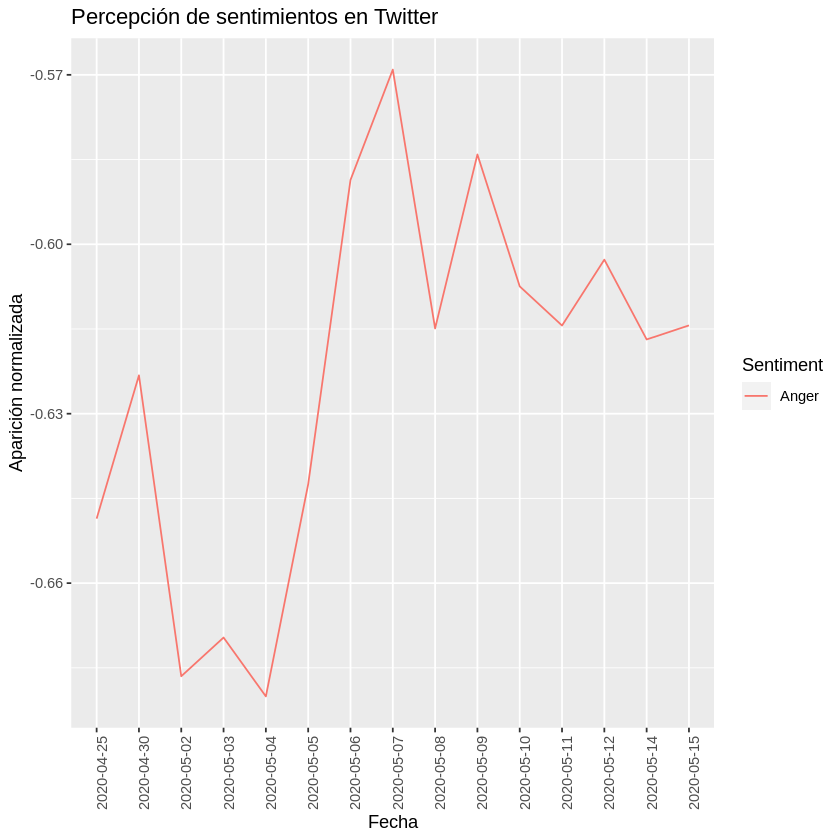

In [ ]:
# df_basta <-
# (filter(df_complete_hashtags, hashtag_group == 'BastaDeCuarentena') %>%
# select(., date, hashtag_group, date_count))[-c(1)]  #hice esto para droppear la primer columna que era group_count que no se por que me lo agregaba

# names(df_basta)

# head(df_basta)
# head(filter(sents_normalized_t, sentiment == 'Anger'))

ggplot(data = filter(df_complete_hashtags, hashtag_group == 'BastaDeCuarentena' ), aes(x = date, y = date_count, group = hashtag_group)) +
  geom_line(aes(color = hashtag_group)) + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title="Mención de Grupo de Hashtags (con al menos 100 citas en el período)", x ="Fecha", y = "Veces utilizado", color = "Grupo de Hashtag")

ggplot(data = filter(sents_normalized_t, sentiment == 'Anger'), aes(x = created_at, y = normalized_count, group = sentiment)) +
  geom_line(aes(color = sentiment)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title="Percepción de sentimientos en Twitter", x ="Fecha", y = "Aparición normalizada", color = "Sentiment")

`

Nube de palabras

In [ ]:
'#Código para crear la nuve de palabras, no ejecutar acá que se tilda
#  #Agrupado por hashtag group
#  set.seed(1234) # for reproducibility 
#  wordcloud(words = df_hashtag_info_grouped$hashtag_group, 
#      freq = df_hashtag_info_grouped$group_count, 
#      min.freq = 1, 
#      max.words=50, 
#      random.order=FALSE, 
#      rot.per=0.35, 
#      colors=brewer.pal(8, "Spectral"))


#  #Agrupado por hashtag
#  set.seed(1234) # for reproducibility 
#  wordcloud(words = Hashtags_info$hashtag, 
#            freq = Hashtags_info$count, 
#            min.freq = 1, 
#            max.words=50, 
#            random.order=FALSE, 
#            rot.per=0.35, 
#            colors=brewer.pal(8, "Spectral"))
 

# Análisis retweets

In [ ]:
df_retweets <- select(Tweets, retweet_status_id, retweet_favorite_count, retweet_retweet_count, retweet_followers_count, retweet_friends_count, 
  retweet_statuses_count, retweet_verified) %>%
  drop_na() %>%
  mutate(retweet_verified_int = as.numeric(retweet_verified))

df_retweets_numeric <- select(df_retweets, retweet_favorite_count, retweet_retweet_count, retweet_followers_count, retweet_friends_count, 
  retweet_statuses_count, retweet_verified_int) 

head(df_retweets_numeric)

,retweet_favorite_count,retweet_retweet_count,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_verified_int
,<int>,<int>,<int>,<int>,<int>,<dbl>
1,8,1,68964,2239,147973,0
2,77,65,47677,775,88550,1
3,1026,274,40737,1329,95801,0
4,0,1,2,61,47,0
5,1,2,525,1405,22706,0
6,1,1,100,163,6083,0


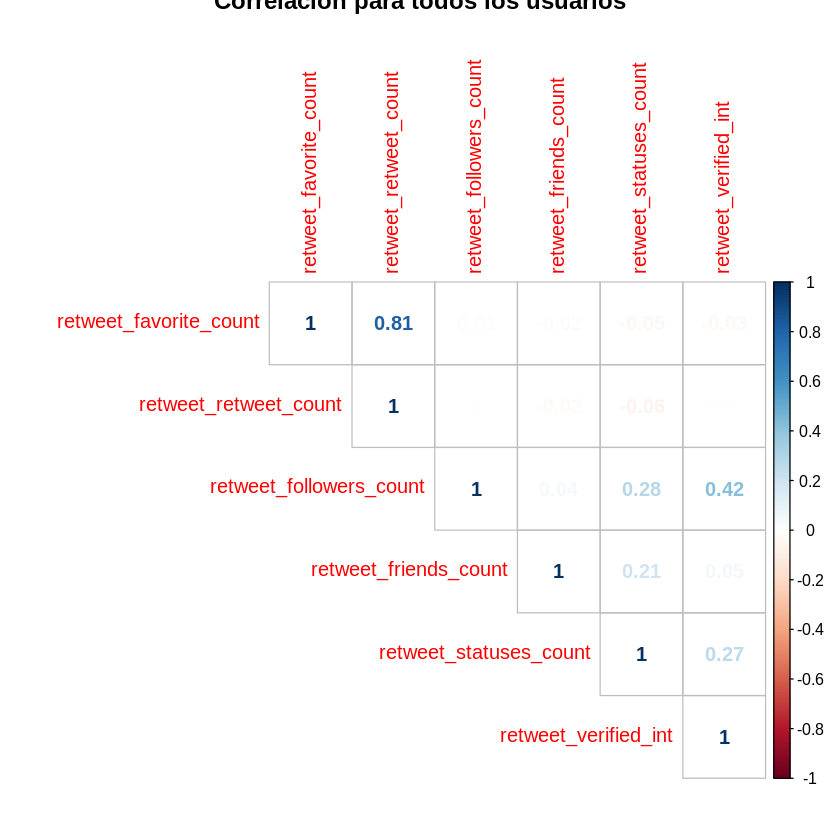

In [ ]:
corrplot(cor(df_retweets_numeric), method="number", type= "upper", title= "Correlación para todos los usuarios")

Importance of components:
                         PC1    PC2    PC3    PC4     PC5
Standard deviation     1.356 1.1945 0.9558 0.8080 0.40840
Proportion of Variance 0.368 0.2853 0.1827 0.1306 0.03336
Cumulative Proportion  0.368 0.6534 0.8361 0.9666 1.00000

,PC1,PC2,PC3,PC4,PC5
retweet_favorite_count,0.7022047858,-0.07413143,0.03347263,-0.02784171,-0.706765444
retweet_retweet_count,0.7027855578,-0.06948018,0.02927740,-0.01010512,0.707322899
retweet_followers_count,-0.0004588653,-0.44510207,-0.86226395,0.24159431,-0.004124147
retweet_friends_count,-0.0662394022,-0.60162141,0.48703057,0.62963916,-0.004446459
retweet_statuses_count,-0.0928064088,-0.65544860,0.13162264,-0.73777330,0.011838242


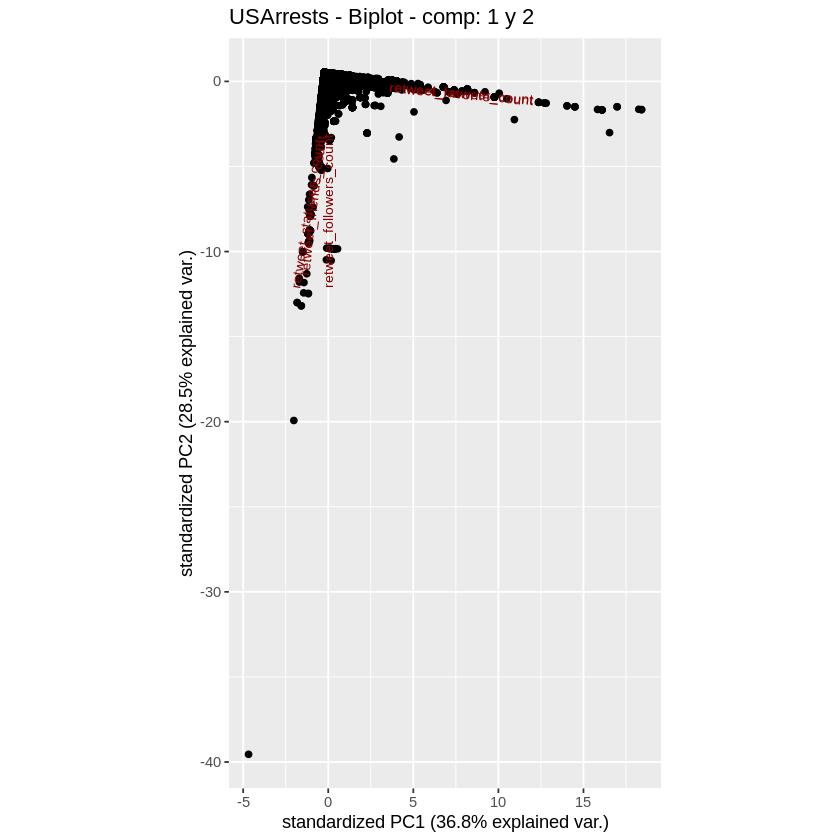

In [ ]:
df_retweet_pca <-filter(df_retweets_numeric, retweet_verified_int == 0) %>%
select(., -c(retweet_verified_int)) %>%
prcomp(., center=TRUE, scale = TRUE)

summary(df_retweet_pca)
df_retweet_pca$rotation

ggbiplot(df_retweet_pca, choices = 1:2)+ 
ggtitle('USArrests - Biplot - comp: 1 y 2')